In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.linear_model import LinearRegression

### Simple Linear Regression

In [2]:
wc=pd.read_csv(r"C:\Users\aksha\Downloads\wc-at.csv")

In [3]:
wc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [4]:
wc.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


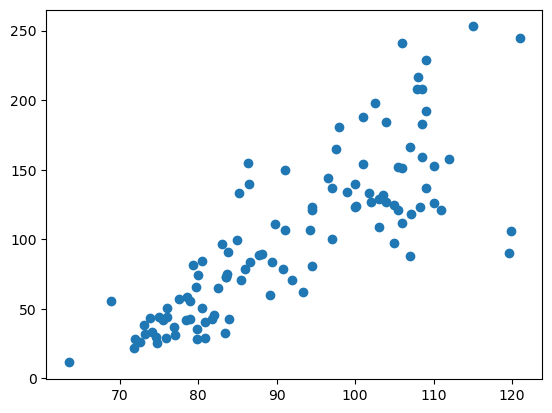

In [5]:
plt.scatter(x='Waist',y='AT',data=wc)
plt.show()

In [6]:
wc.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


<Axes: >

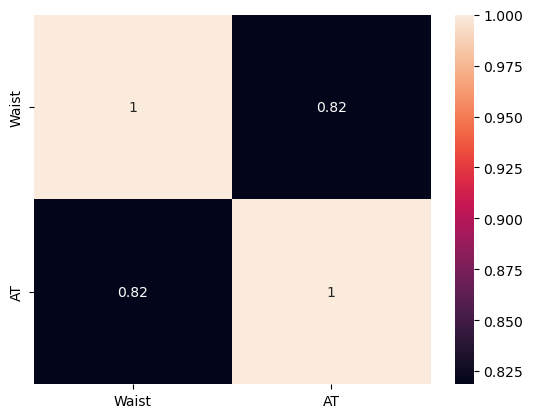

In [7]:
sns.heatmap(wc.corr(),annot=True)

In [8]:
model=smf.ols('AT~Waist',data=wc).fit()

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Thu, 02 May 2024   Prob (F-statistic):           1.62e-27
Time:                        09:08:51   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='Waist', ylabel='AT'>

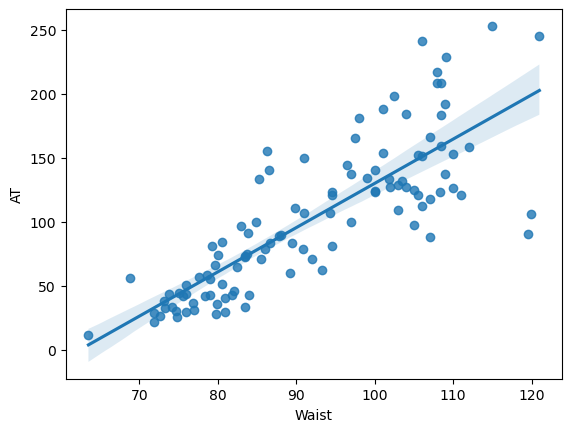

In [10]:
sns.regplot(x='Waist',y='AT',data=wc)

## Mutilinear Regression


#### Read the dataset

In [11]:
cars = pd.read_csv(r'C:\Users\aksha\Downloads\Cars (2).csv')
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [12]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [13]:
cars.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


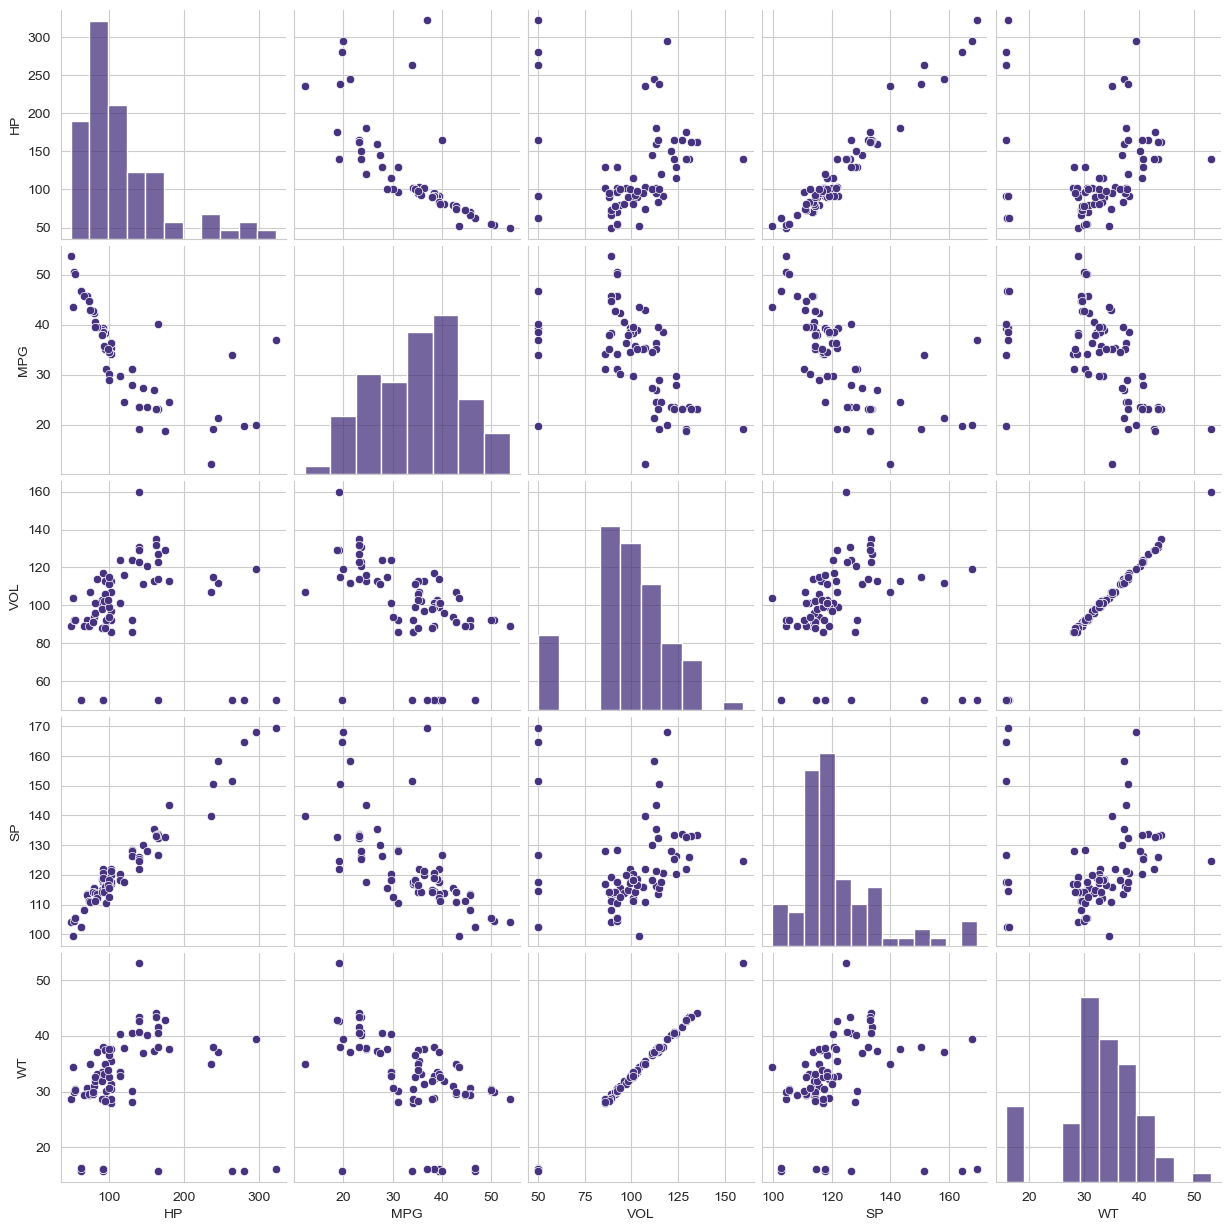

In [14]:
sns.set_palette('viridis')
sns.set_style(style='whitegrid')
sns.pairplot(cars)

<Axes: >

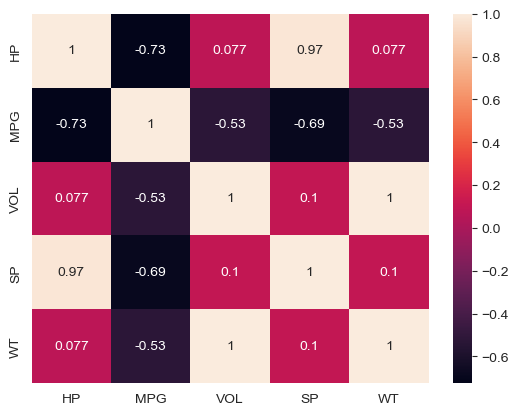

In [15]:
sns.heatmap(cars.corr(),annot=True)

In [16]:
model=smf.ols('MPG~HP+VOL+SP+WT',data=cars).fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Thu, 02 May 2024   Prob (F-statistic):           1.54e-23
Time:                        09:08:58   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
model1=smf.ols('MPG~WT',data=cars).fit()

In [19]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     30.34
Date:                Thu, 02 May 2024   Prob (F-statistic):           4.38e-07
Time:                        09:08:58   Log-Likelihood:                -280.42
No. Observations:                  81   AIC:                             564.8
Df Residuals:                      79   BIC:                             569.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.2296      3.876     14.249      0.000      47.514      62.945
WT            -0.6420      0.117     -5.508      0.000      -0.874      -0.410
==============================================================================
Omnibus:                        2.735   Durbin-Watson:                   0.555
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                2.045
Skew:                          -0.263   Prob(JB):                        0.360
Kurtosis:                       3.573   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model2=smf.ols('MPG~VOL',data=cars).fit()

In [21]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     30.71
Date:                Thu, 02 May 2024   Prob (F-statistic):           3.82e-07
Time:                        09:08:58   Log-Likelihood:                -280.28
No. Observations:                  81   AIC:                             564.6
Df Residuals:                      79   BIC:                             569.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.8171      3.957     14.106      0.000      47.941      63.693
VOL           -0.2166      0.039     -5.541      0.000      -0.294      -0.139
==============================================================================
Omnibus:                        2.691   Durbin-Watson:                   0.566
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.997
Skew:                          -0.263   Prob(JB):                        0.368
Kurtosis:                       3.562   Cond. No.                         462.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
model2=smf.ols('MPG~VOL+WT',data=cars).fit()

In [23]:
model2.summary()#here the rsquare is less

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     15.33
Date:                Thu, 02 May 2024   Prob (F-statistic):           2.43e-06
Time:                        09:08:58   Log-Likelihood:                -280.16
No. Observations:                  81   AIC:                             566.3
Df Residuals:                      78   BIC:                             573.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.8847      4.534     12.546      0.000      47.858      65.912
VOL           -0.6983      0.984     -0.710      0.480      -2.658       1.261
WT             1.4349      2.929      0.490      0.626      -4.397       7.266
==============================================================================
Omnibus:                        2.405   Durbin-Watson:                   0.591
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                1.712
Skew:                          -0.251   Prob(JB):                        0.425
Kurtosis:                       3.506   Cond. No.                         597.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### we can remove WT or VOL , to decide which one to remove 

### Find VIF

In [24]:
rsq_hp = smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared  
vif_hp = 1/(1-rsq_hp) 

rsq_wt = smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared  
vif_wt = 1/(1-rsq_wt) 

rsq_vol = smf.ols('VOL~WT+SP+HP',data=cars).fit().rsquared  
vif_vol = 1/(1-rsq_vol) 

rsq_sp = smf.ols('SP~WT+VOL+HP',data=cars).fit().rsquared  
vif_sp = 1/(1-rsq_sp) 

# Storing vif values in a data frame
d1 = {'Variables':['Hp','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Hp,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


In [25]:
rsq_hp

0.949815796308406

In [26]:
rsq_sp

0.950019089666534

In [27]:
rsq_vol

0.9984345797174133

In [28]:
rsq_wt

0.9984363610296332

### here we can drop WT because the R2 is low for WT and WT have more VIF

In [29]:
model=smf.ols('MPG~HP+VOL+SP',data=cars).fit()

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Thu, 02 May 2024   Prob (F-statistic):           1.56e-24
Time:                        09:08:59   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
SP             0.4007      0.156      2.571      0.012       0.090       0.711
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Residual analysis 

### check whether the error are normally distributed or not

In [31]:
model.resid

0     10.109912
1      7.756607
2      7.756607
3      3.334825
4      8.234688
        ...    
76    15.666857
77     1.330162
78     7.783144
79     7.596179
80    -3.491695
Length: 81, dtype: float64

<Axes: ylabel='Density'>

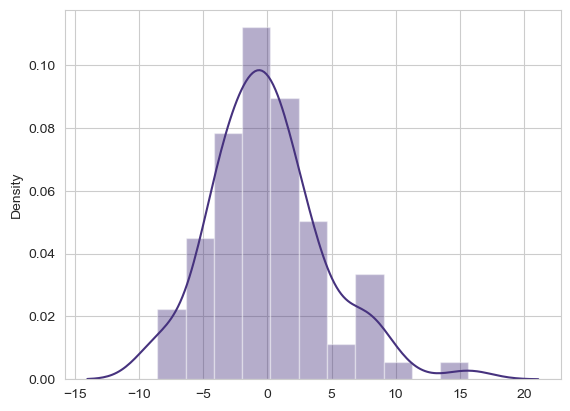

In [32]:
sns.distplot(model.resid)

In [33]:
import statsmodels.api as sm

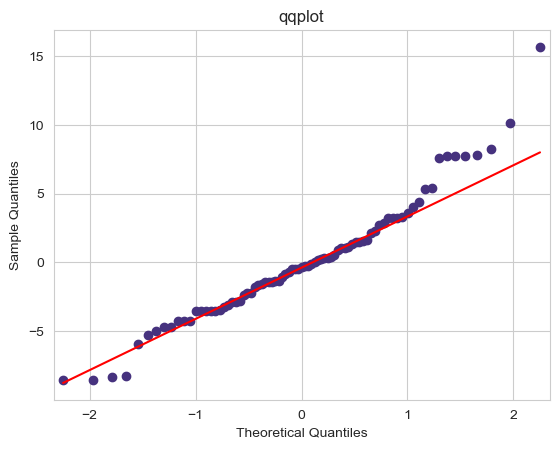

In [34]:
#to check wheather the errors are following normal distribution or not
qqplot=sm.qqplot(model.resid,line='q')
plt.title('qqplot')
plt.show()

In [35]:
# here the errors are reasonably normally distributed,here there are some errors above 10
# lets find those errors

In [36]:
import numpy as np

In [37]:
list(np.where(model.resid>10))

[array([ 0, 76], dtype=int64)]

In [38]:
# here at position at 0 and 76 we have error above 10

### the errors are following a normal distribution

In [39]:
for i in model.resid:
    print((i-model.resid.mean())/model.resid.std())

2.3104256968919996
1.7726232240265731
1.7726232240265731
0.7621101144517175
1.881879311349412
0.6491230971638995
1.7726232240265731
-0.3235200079013613
-0.3235200079013613
0.35031803408464834
0.7354951156674652
-1.9623613131733197
-0.11690679513947787
0.7354951156674652
0.9267989597879082
0.7354951156674652
0.34658711327596714
-1.9623613131733197
0.34658711327596714
0.2021623235702584
-0.05774310259053405
1.2268603701472147
0.04478990078917378
0.23908589888776768
-0.4071581500494999
-1.9031976206243726
0.6201789645111805
-0.05774310259053405
1.2282992497138943
-0.10709673969019344
1.0033799844930495
0.513769609818933
-0.23799960334718492
0.3645977886147496
0.4865612815790053
0.07301433284790662
-0.303609033694691
-0.975306540222551
-0.975306540222551
-1.1323629751219173
0.23288040455046222
-0.03075595386061829
-0.7493325148032142
-0.7086780209623312
-0.07214921681733755
-0.3764400690692977
0.07550797261307671
-0.11653464290850692
-1.3583370005412543
-0.8111162068140361
-0.8111162068140

### Residual plot for Homoscedasticity

In [40]:
def stand_values(vals):
    return(vals-vals.mean()/vals.std())

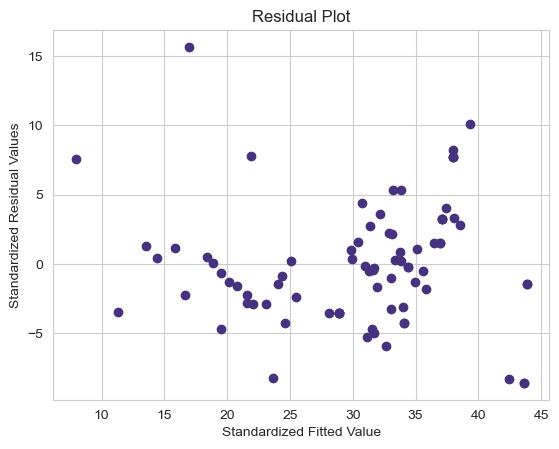

In [41]:
plt.scatter(stand_values(model.fittedvalues),stand_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Value')
plt.ylabel('Standardized Residual Values')
plt.show()

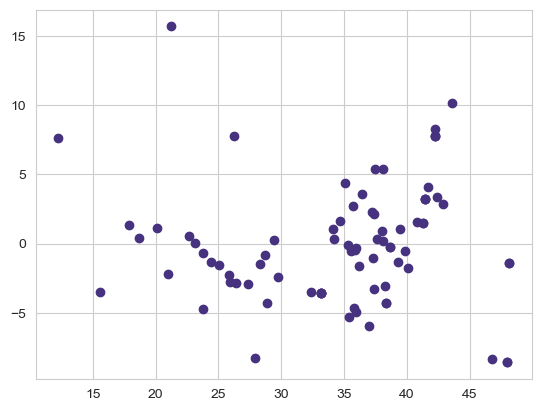

In [42]:
plt.scatter(model.fittedvalues,model.resid)

### From this figure we can understand that there is homoscedacity (there is no pattern ,and no funnel shape)

### Residual vs Regression plot

In [43]:
from statsmodels.graphics.regressionplots import influence_plot

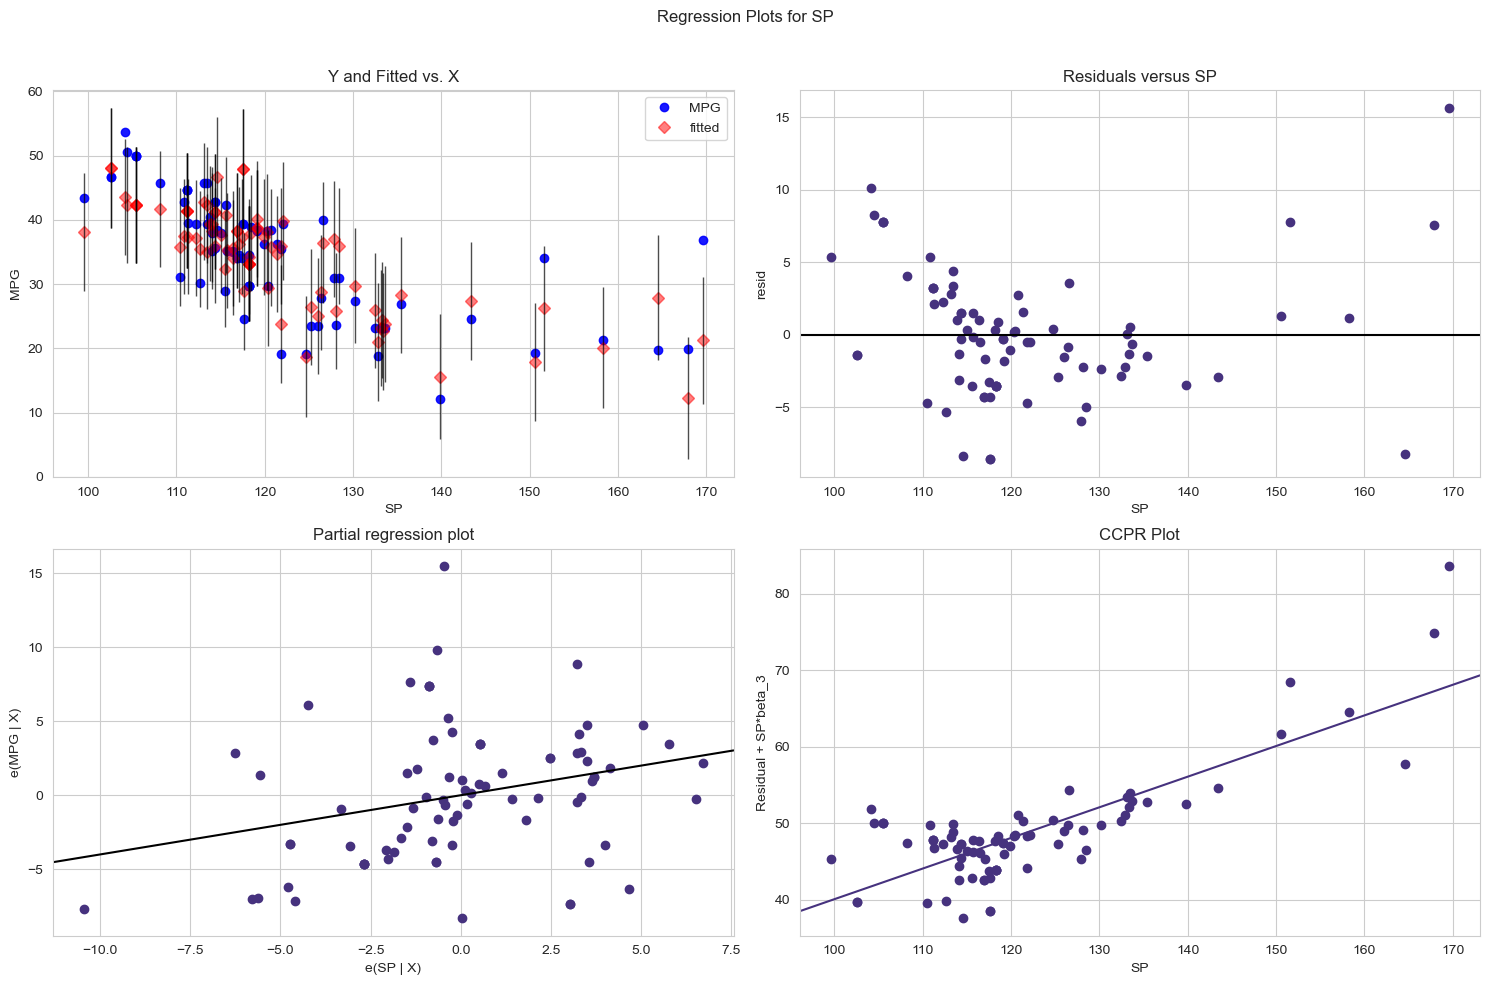

In [44]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'SP',fig=fig)
plt.show()

#### RESIDUAL VS REGRESSORS

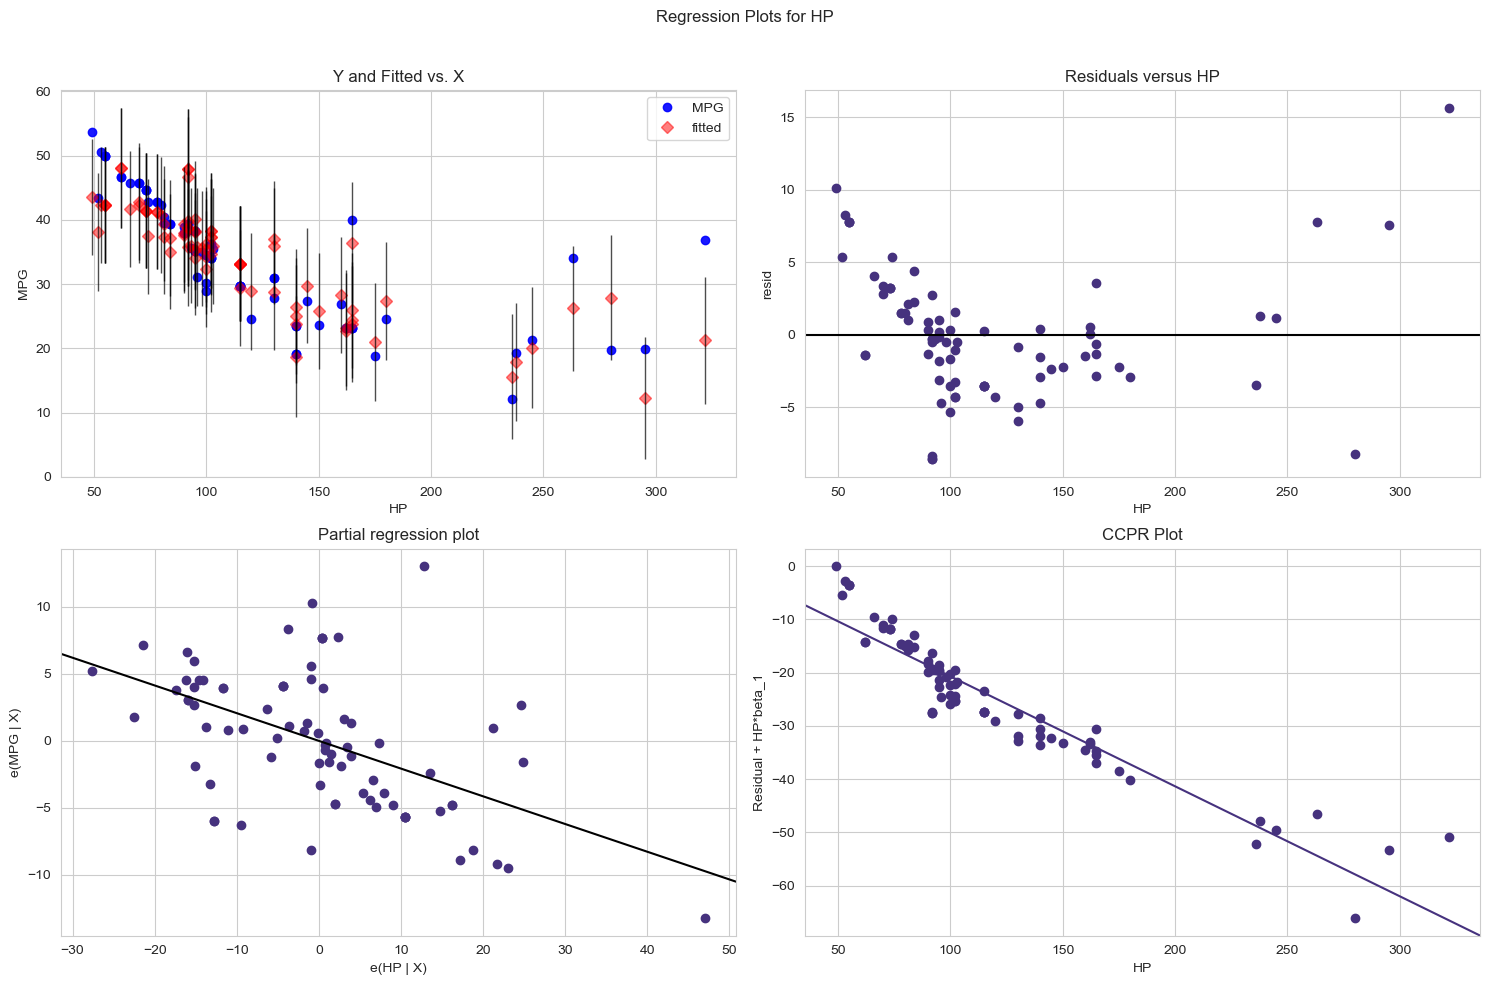

In [45]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

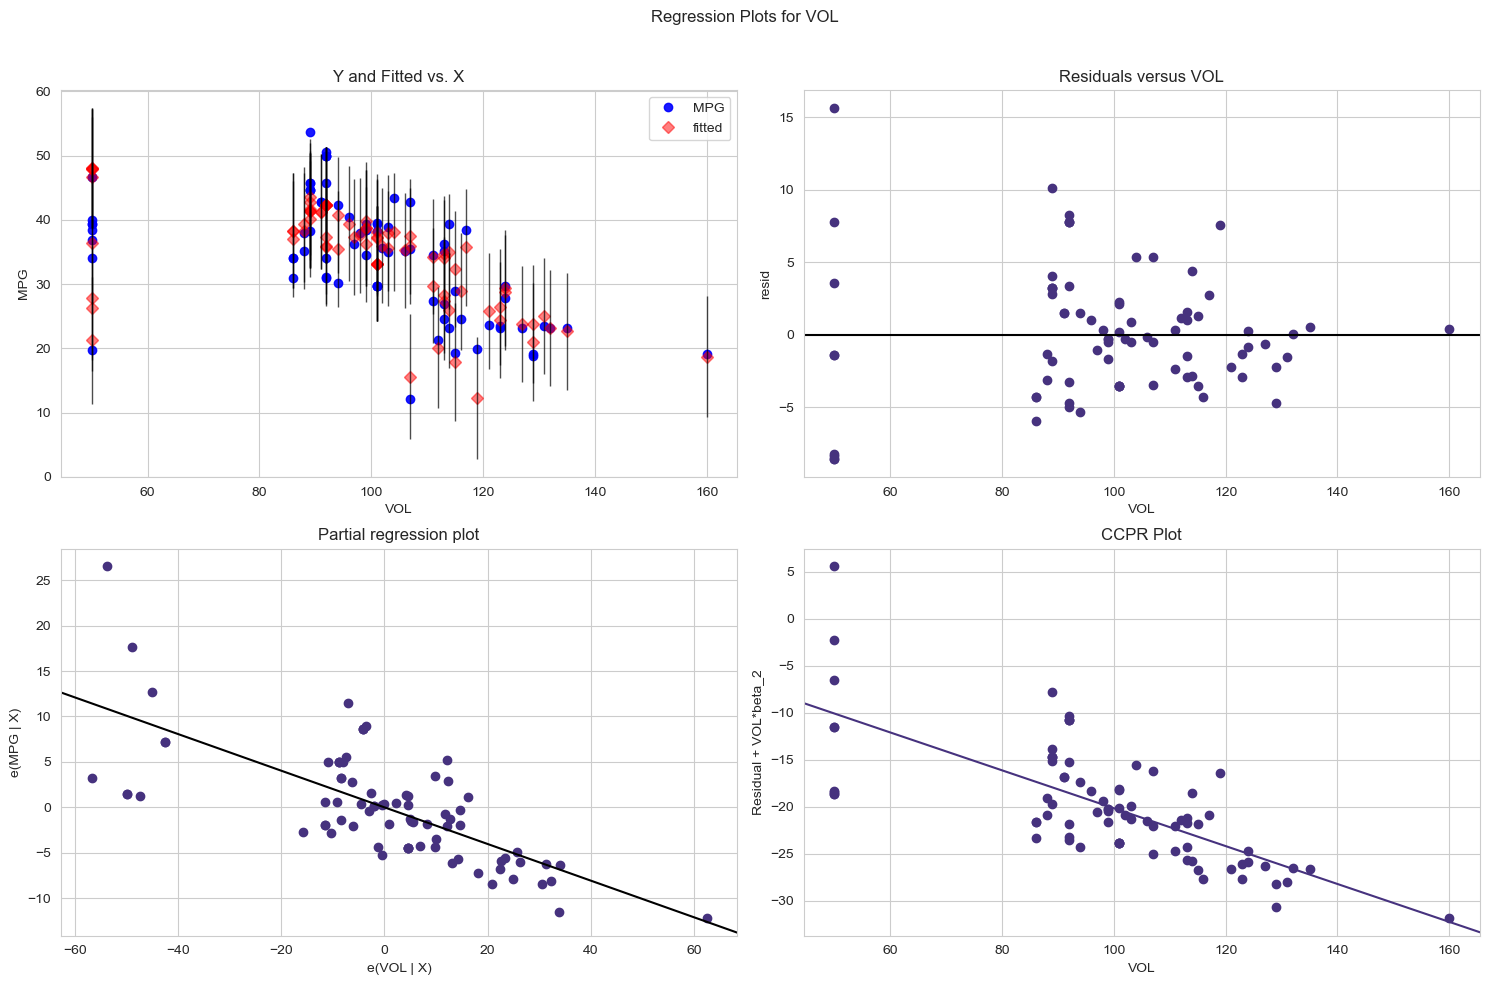

In [46]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'VOL',fig=fig)
plt.show()

### Model Deletion Diagnosis 

In [47]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

<StemContainer object of 3 artists>

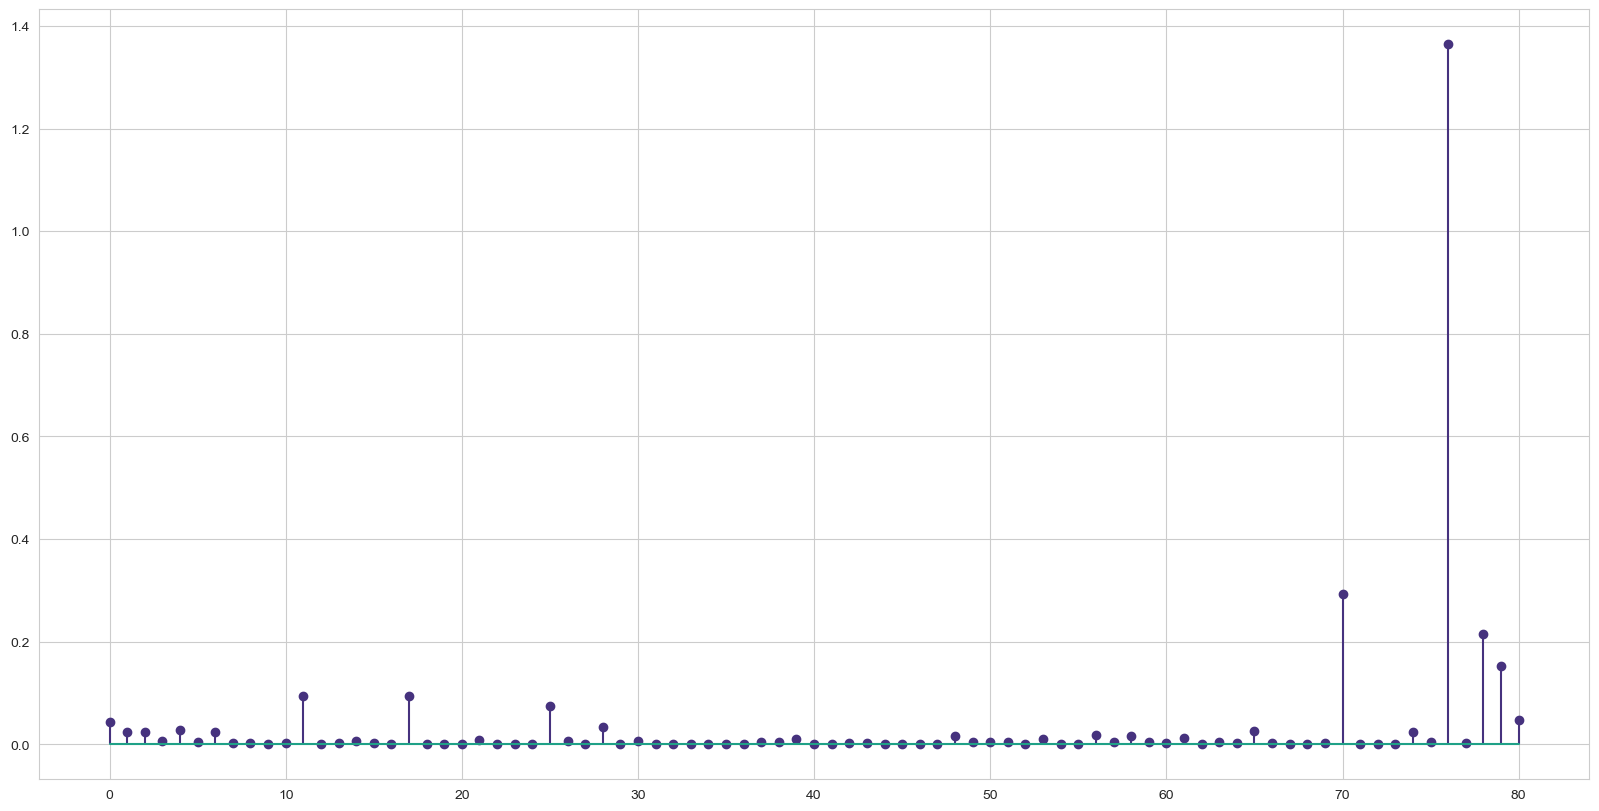

In [48]:
plt.figure(figsize=(20,10))
plt.stem(cars.index,c)

In [50]:
np.argmax(c),np.max(c)

(76, 1.3641743869103489)

In [51]:
model.fittedvalues

0     43.590769
1     42.256794
2     42.256794
3     42.361497
4     42.269544
        ...    
76    21.233143
77    17.867725
78    26.216856
79    12.237554
80    15.592958
Length: 81, dtype: float64

In [ ]:
influence_plot(model)
plt.show()

In [ ]:
cars[76:77]

In [ ]:
cars[70:71]

### improve the model

In [ ]:
cars1=cars.copy()

In [ ]:
cars2=cars1.drop(cars1.index[[70,76]],axis=0).reset_index()
cars2

In [ ]:
cars2.drop('index',axis=1)

In [ ]:
model2=smf.ols('MPG~HP+VOL+SP',data=cars2).fit()
model2.summary()

In [ ]:
influence_plot(model2)
plt.show()

In [ ]:
model_influence_2=model2.get_influence()

In [ ]:
(c_2,_)=model_influence_2.cooks_distance


In [ ]:
plt.figure(figsize=(20,10))
plt.stem(cars2.index,c_2)
plt.show()

In [ ]:
np.argmax(c_2),np.max(c_2)

In [ ]:
cars2[76:78]

In [ ]:
cars3=cars2.drop(cars2.index[[76,77]],axis=0).reset_index()
cars3

In [ ]:
cars3.drop(['level_0','index'],axis=1,inplace=True)

In [ ]:
cars3

In [ ]:
model3=smf.ols('MPG~HP+VOL+SP',data=cars3).fit()
model3.summary()

In [ ]:
influence_plot(model3)
plt.show()

In [ ]:
model_influence_3=model3.get_influence()
(c3,_)=model_influence_3.cooks_distance

In [ ]:
plt.figure(figsize=(20,10))
plt.stem(cars3.index,c3)


In [ ]:
np.argmax(c3)

In [ ]:
cars3.iloc[65]

In [ ]:
cars3.drop(cars3.index[65],inplace=True)

In [ ]:
cars3.reset_index(inplace=True)

In [ ]:
model4=smf.ols('MPG~HP+VOL+SP',data=cars3).fit()
model4.summary()

In [ ]:
model_influence_4=model4.get_influence()
(c4,_)=model_influence_4.cooks_distance

In [ ]:
plt.stem(cars3.index,c4)

In [ ]:
cars3.shape[1]

In [ ]:
k=cars3.shape[1]
n=cars3.shape[0]
leveragecutt0ff=(3*(k+1))/n

In [ ]:
leveragecutt0ff

In [ ]:
np.max(c4)

In [ ]:
'''while np.max(c4)>leveragecutt0ff:
    model=smf.ols('MPG~HP+VOL+SP',data=cars3).fit()
    model_influence=model.get_influence()
    (c4,_)=model_influence.cooks_distance
    np.argmax(c4),np.max(c4)
    cars3.drop(cars3.index[np.argmax(c4)],axis=0).reset_index(drop=True)
else:
    final_model=smf.ols('MPG~HP+VOL+SP',data=cars3).fit()
    final_model.rsquared '''